In [17]:
!pip install music21

In [45]:
import pretty_midi
import statistics
import numpy as np
from music21 import converter, note, tempo
import matplotlib.pyplot as plt


def analyze_midi(file_path):
    try:
        # Load the MIDI file
        midi_data = pretty_midi.PrettyMIDI(file_path)

        # Extract musical metrics
        note_count = len(midi_data.instruments[0].notes)
        pitch_range = calculate_pitch_range(midi_data)
        tempo = midi_data.estimate_tempo()
        note_durations = extract_note_durations(midi_data)
        note_density = calculate_note_density(file_path)


        # Print the extracted metrics
        print("Note Count:", note_count)
        print("Pitch Range (MIDI Note Numbers):", pitch_range)
        print("Estimated Tempo (BPM):", tempo)
        print("Note Duration Statistics (seconds):")
        print("  - Average Duration:", statistics.mean(note_durations))
        print("  - Minimum Duration:", min(note_durations))
        print("  - Maximum Duration:", max(note_durations))
        print("Note Density:", note_density)

        # plt.figure(figsize=(10, 6))
        # melodic_contour = calculate_melodic_contour(midi_file_path)
        # plt.plot(melodic_contour)

        # plt.xlabel("Time")
        # plt.ylabel("Pitch Difference")
        # plt.title("Melodic Contour")
        # plt.legend()
        # plt.grid(True)
        # plt.show()



    except Exception as e:
        print("Error:", e)

def calculate_pitch_range(midi_data):
    min_note = min(note.pitch for instrument in midi_data.instruments for note in instrument.notes)
    max_note = max(note.pitch for instrument in midi_data.instruments for note in instrument.notes)
    return min_note, max_note

def extract_note_durations(midi_data):
    note_durations = [note.end - note.start for instrument in midi_data.instruments for note in instrument.notes]
    return note_durations

def calculate_note_density(midi_file_path):
    midi_score = converter.parse(midi_file_path)

    # Calculate note density per note
    notes = midi_score.flat.getElementsByClass(note.Note)
    note_density_by_note = {}
    total_time = midi_score.flat.highestTime

    for n in notes:
        note_name = n.nameWithOctave
        note_density_by_note[note_name] = note_density_by_note.get(note_name, 0) + 1

    for note_name, count in note_density_by_note.items():
        note_density_by_note[note_name] = count / total_time

    return note_density_by_note

def calculate_melodic_contour(midi_file_path):
    # Load MIDI file
    midi_score = converter.parse(midi_file_path)

    # Calculate melody contour (pitch variations)
    melody_contour = []
    current_pitch = None

    for event in midi_score.flat.notesAndRests:
        if isinstance(event, note.Note):
            if current_pitch is not None:
                pitch_diff = event.pitch.ps - current_pitch
                melody_contour.append(pitch_diff)
            current_pitch = event.pitch.ps

    return melody_contour






In [44]:
# Example usage
midi_file_path = "music_t0.9.mid"
analyze_midi(midi_file_path)

Note Count: 56
Pitch Range (MIDI Note Numbers): (61, 98)
Estimated Tempo (BPM): 109.09090909090908
Note Duration Statistics (seconds):
  - Average Duration: 0.5669642857142857
  - Minimum Duration: 0.125
  - Maximum Duration: 1.625
Note Density: {'D7': 0.015625, 'E4': 0.0625, 'F#4': 0.328125, 'G#4': 0.15625, 'F4': 0.203125, 'B-4': 0.046875, 'B4': 0.03125, 'C#5': 0.03125, 'E-4': 0.140625, 'C#4': 0.09375}
Error: calculate_note_density() takes 1 positional argument but 2 were given


/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [41]:
import pandas as pd
data=pd.read_csv('english_data.csv')

In [42]:
data

,Unnamed: 0,artist,seq,song,label,Language
0,0,Otis Redding,They call me Mr. Pitiful\nBaby that's my name ...,Mr. Pitiful [Live],0.9640,en
1,1,M. Ward,"Well, since time I had a mind, I been lazy\nAn...",Never Had Nobody Like You,0.9250,en
2,3,Julia Rich,Close your eyes and I'll kiss you\nTomorrow I'...,All My Loving,0.4940,en
3,4,This Mortal Coil,"Alone, with too much generosity.\nA theater ma...",Alone,0.0712,en
4,5,Vader,"[Music: Piotr Wiwczarek, Lyric: Lukasz Szurmin...",Privilege of the Gods,0.0393,en
...,...,...,...,...,...,...
7840,7993,Biz Markie,Goes around\nWhat comes around goes around\n\n...,What Comes Around Goes Around,0.9220,en
7841,7994,"Harry Connick, Jr.",O little town of Bethlehem\nHow still we see t...,O Little Town of Bethlehem,0.0429,en
7842,7995,Ella Fitzgerald,Ella: The tables are empty\nThe dance floor'...,Learnin the Blues,0.4840,en
7843,7997,Gwen Stefani,I really don't wanna embarrass myself\nAnd no ...,Truth,0.0960,en


/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)
<ipython-input-63-13c66b3b30f7>:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


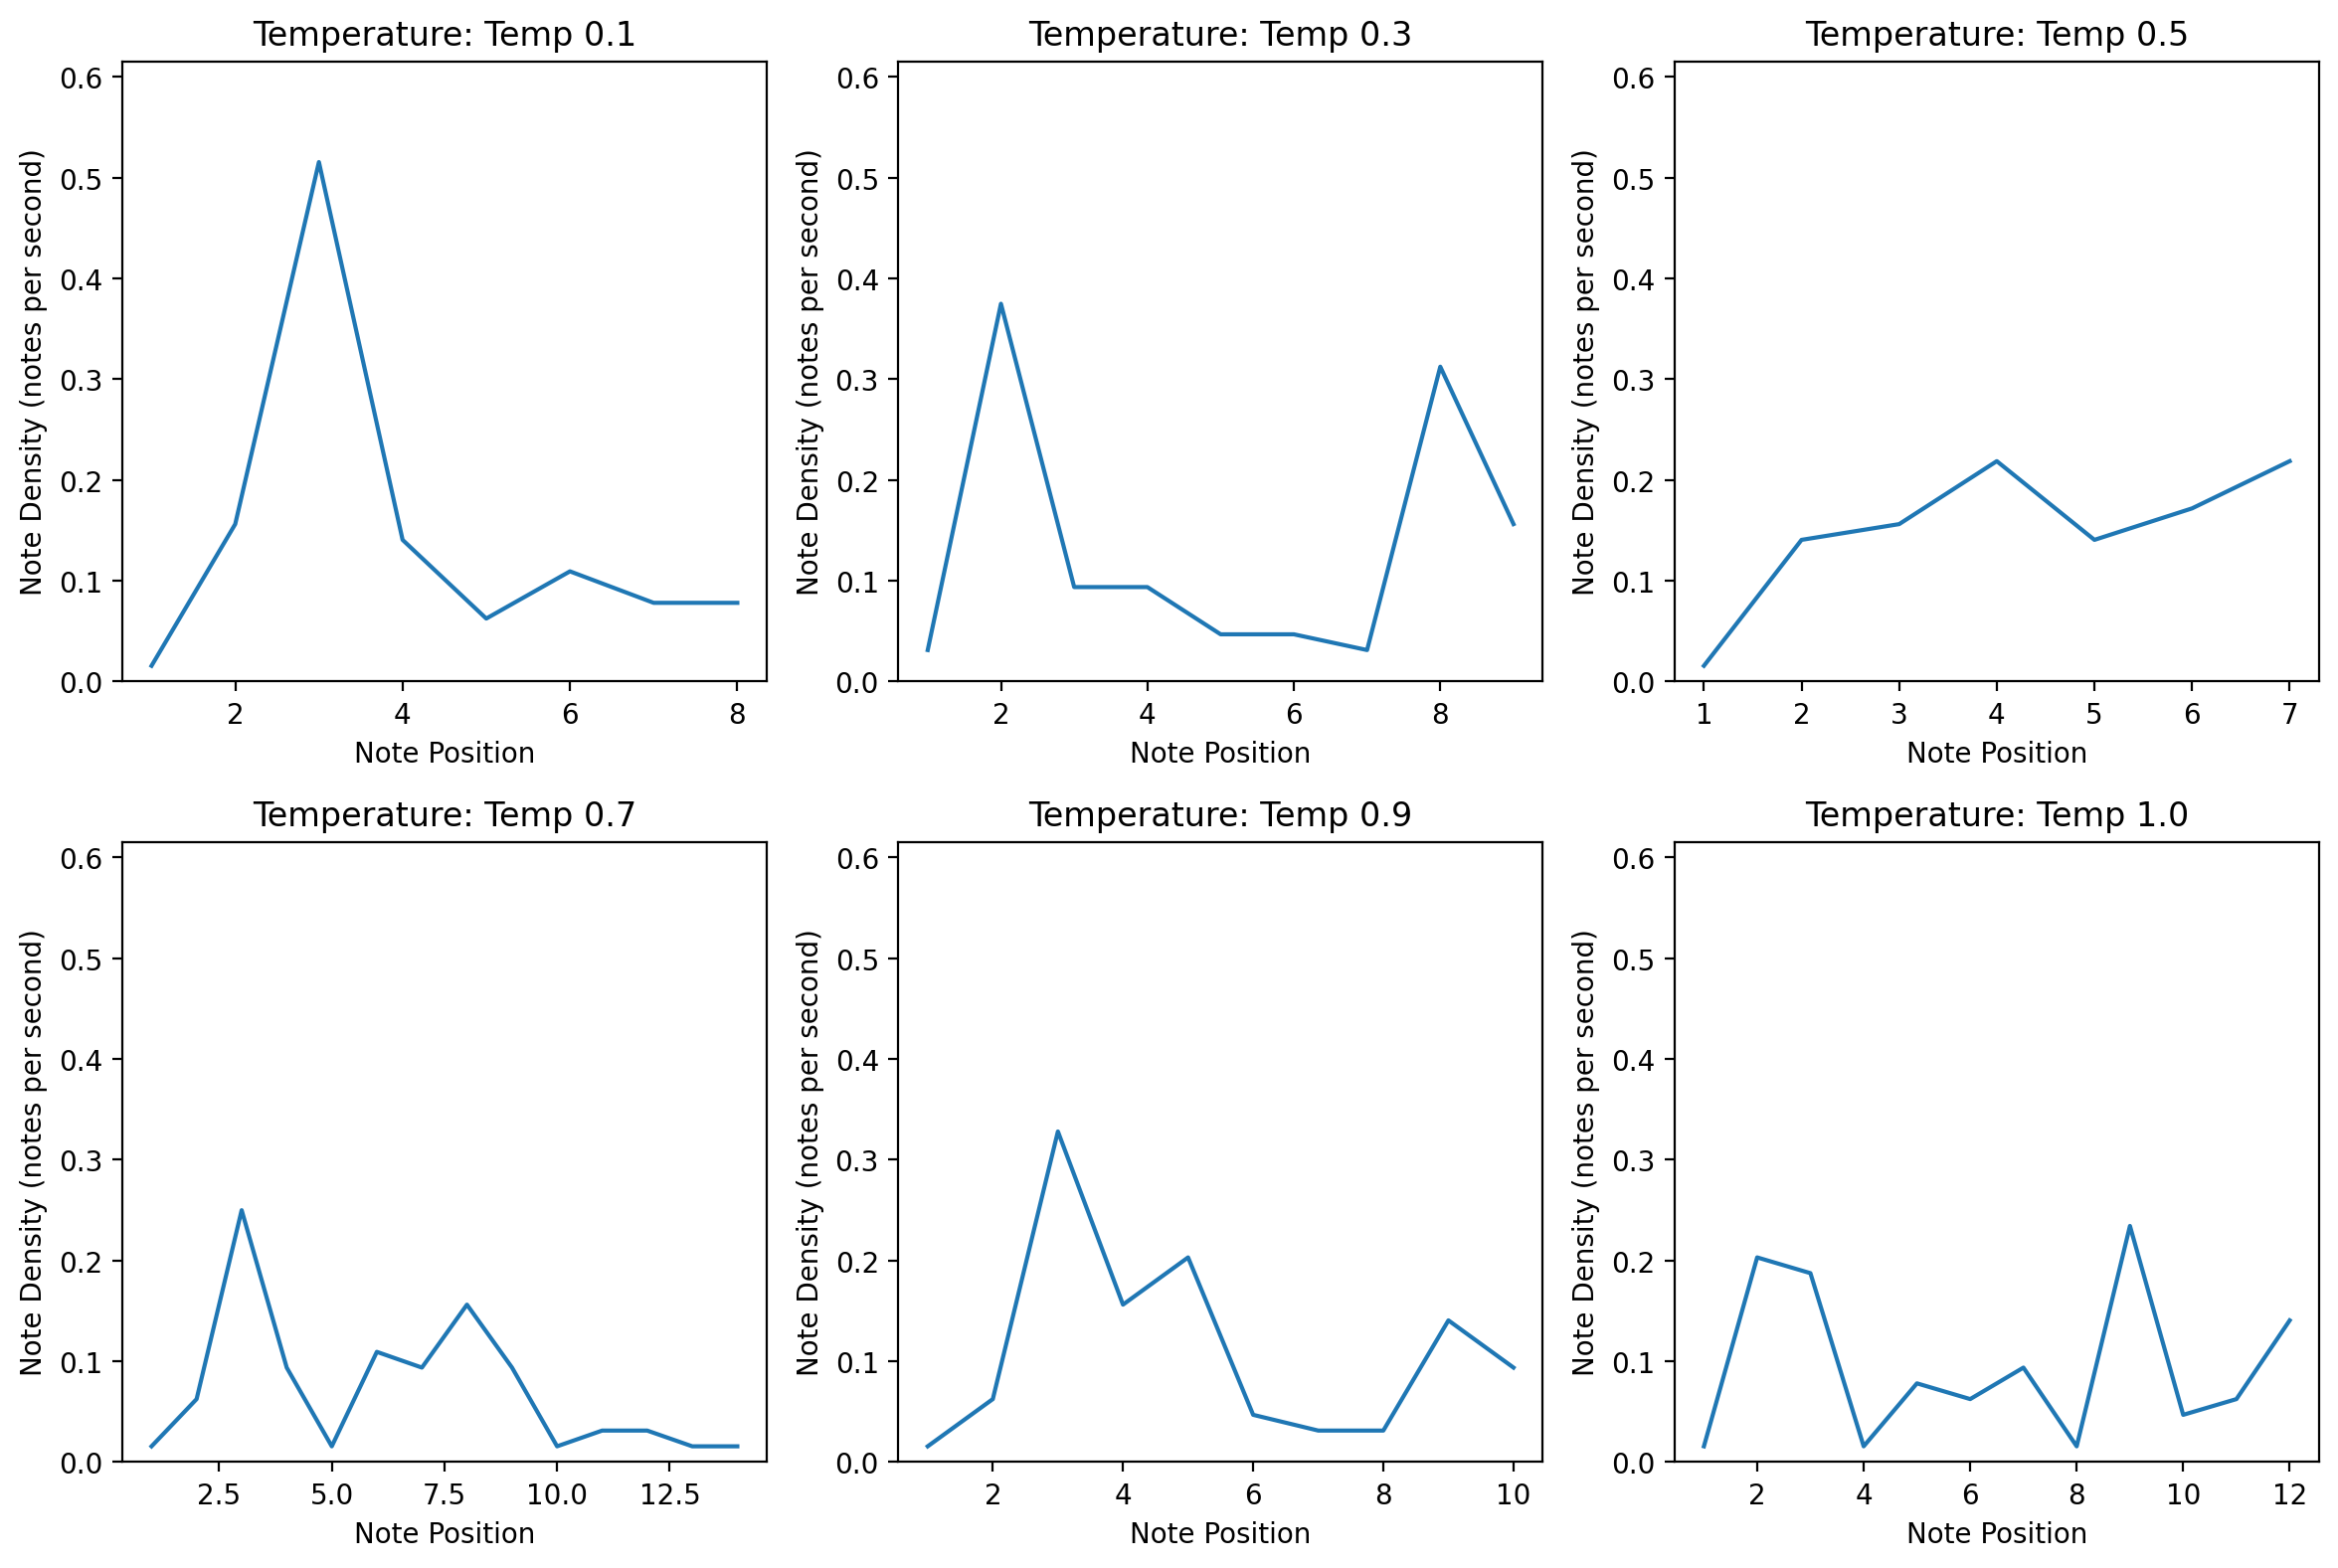

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from music21 import converter, note

def calculate_note_density_by_temperature(midi_file_path, temperature, time_interval=1.0):
    # Load MIDI file
    midi_score = converter.parse(midi_file_path)

    # Calculate note density per note
    notes = midi_score.flat.getElementsByClass(note.Note)
    note_density_by_note = {}
    total_time = midi_score.flat.highestTime

    for n in notes:
        note_name = n.nameWithOctave
        note_density_by_note[note_name] = note_density_by_note.get(note_name, 0) + 1

    for note_name, count in note_density_by_note.items():
        note_density_by_note[note_name] = count / total_time

    return note_density_by_note

# MIDI file paths for different temperature values
midi_files = {
    "Temp 0.1": "music_t0.1.mid",
    "Temp 0.3": "music_t0.3.mid",
    "Temp 0.5": "music_t0.5.mid",
    "Temp 0.7": "music_t0.7.mid",
    "Temp 0.9": "music_t0.9.mid",
    "Temp 1.0": "music_t1.mid",
}

# Calculate the overall maximum note density across all MIDI files
max_note_density = 0
for temp_value, midi_file_path in midi_files.items():
    note_density_by_note = calculate_note_density_by_temperature(midi_file_path, temp_value)
    max_note_density = max(max_note_density, max(note_density_by_note.values()))

# Create a grid of plots for each temperature value
fig, axs = plt.subplots(2, 3, figsize=(12, 8), constrained_layout=True)

for idx, (temp_value, midi_file_path) in enumerate(midi_files.items()):
    row = idx // 3
    col = idx % 3

    # Calculate note density for the current temperature value
    note_density_by_note = calculate_note_density_by_temperature(midi_file_path, temp_value)
    note_densities = list(note_density_by_note.values())

    # Plot note density for the current temperature value
    x_values = np.linspace(1, len(note_densities), len(note_densities))  # Evenly spaced x-axis values
    axs[row, col].plot(x_values, note_densities)
    axs[row, col].set_title(f"Temperature: {temp_value}")
    axs[row, col].set_xlabel("Note Position")
    axs[row, col].set_ylabel("Note Density (notes per second)")
    axs[row, col].set_ylim([0, max_note_density + 0.1])  # Set fixed y-axis range

# Show the plot
plt.tight_layout()
plt.show()
